In [1]:
#Draw a Decision Tree by the following data and information
#Here,

#Gain (Weather) = 0.124

#Gain (Humidity) = 0.6

#Gain (Wind) = 0

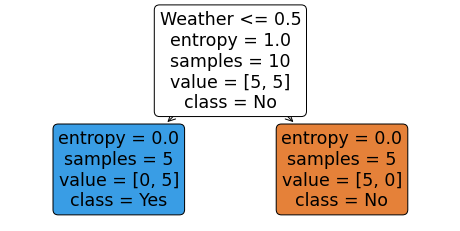


Decision Paths (Matches Manual Tree):
|--- Weather <= 0.50
|   |--- class: 1
|--- Weather >  0.50
|   |--- class: 0



In [2]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Dataset
data = {
    'Weather': ['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 
                'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy'],
    'Humidity': ['Normal', 'Normal', 'Normal', 'High', 'High', 
                 'High', 'High', 'Low', 'Low', 'Low'],
    'Wind': ['Week', 'Week', 'Strong', 'Week', 'Strong', 
             'Strong', 'Week', 'Week', 'Strong', 'Week'],
    'Play': ['No', 'No', 'No', 'No', 'No', 
             'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
}

df = pd.DataFrame(data)

# Encode each column separately
le_weather = LabelEncoder()
df['Weather_encoded'] = le_weather.fit_transform(df['Weather'])  # Sunny=1, Rainy=0

le_humidity = LabelEncoder()
df['Humidity_encoded'] = le_humidity.fit_transform(df['Humidity'])  # High=0, Low=1, Normal=2

le_play = LabelEncoder()
df['Play_encoded'] = le_play.fit_transform(df['Play'])  # No=0, Yes=1

# Features (Humidity and Weather only)
X = df[['Humidity_encoded', 'Weather_encoded']]
y = df['Play_encoded']

# Constrained Decision Tree
clf = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,
    splitter='best'
)

# Fit the model
clf.fit(X, y)

# Visualize
plt.figure(figsize=(8, 4))
tree.plot_tree(
    clf, 
    feature_names=['Humidity', 'Weather'], 
    class_names=['No', 'Yes'],
    filled=True, 
    rounded=True
)
plt.show()

# Print decision rules
print("\nDecision Paths (Matches Manual Tree):")
print(tree.export_text(
    clf, 
    feature_names=['Humidity', 'Weather'],
    spacing=3
))